In [1]:
import geopandas as gpd

In [2]:
# Load a shape file of world lakes as a GeoDataFrame:
world_lakes = gpd.read_file('data/ne_10m_lakes.zip')
world_lakes.head(3)

,featurecla,scalerank,name,name_abb,name_alt,note,delta,dam_name,year,admin,...,name_tr,name_vi,name_zh,ne_id,name_fa,name_he,name_uk,name_ur,name_zht,geometry
0,Lake,9,Eğirdir,Egridir,NaN,NaN,New or modified in version 1.2,NaN,-99,NaN,...,Eğirdir,Eğirdir,埃伊尔迪尔湖,1159106675,اگیردیر,אגם אאירדיר,Егридир,ایگردر,埃伊爾迪爾湖,"POLYGON ((30.80977 38.27069, 30.86011 38.28099..."
1,Lake,7,Beyşehir,Beysehir,NaN,NaN,New or modified in version 1.2,NaN,-99,NaN,...,Beyşehir,Beyşehir,貝伊謝希爾湖,1159106685,بیسهیر,אגם ביישהיר,Бейшехір,بےسحر,貝伊謝希爾湖,"POLYGON ((31.48563 37.61043, 31.46503 37.60778..."
2,Lake,5,Engozero,Engozero,NaN,NaN,New or modified in version 1.2,NaN,-99,NaN,...,Engozero,Hồ Engozero,恩戈澤羅湖,1159106693,انگوزرو,אנגוזרו,Енгозеро,اینگوزیرو,恩戈澤羅湖,"POLYGON ((33.44845 65.65273, 33.42078 65.65097..."


In [3]:
# Make new GeoDataFrame of important lakes using the "scalerank" column:
large_lakes = (world_lakes[world_lakes['scalerank'] == 0]
               [['scalerank', 'name', 'geometry']].reset_index(drop=True))
display(large_lakes)

,scalerank,name,geometry
0,0,Great Bear Lake,"POLYGON ((-118.83685 65.77519, -118.90073 65.7..."
1,0,Great Slave Lake,"POLYGON ((-111.66879 62.38765, -111.67159 62.3..."
2,0,McLeod Bay,"POLYGON ((-111.70250 62.40030, -111.69102 62.4..."
3,0,Lake Winnipeg,"POLYGON ((-96.28032 51.24096, -96.26339 51.222..."
4,0,Lake Erie,"POLYGON ((-83.07676 42.30436, -83.07883 42.303..."
5,0,Lake Ontario,"POLYGON ((-76.08724 43.97046, -76.12006 43.966..."
6,0,Lake Saint Clair,"POLYGON ((-83.08162 42.30907, -83.06190 42.327..."
7,0,Lake Superior,"POLYGON ((-84.49298 46.47352, -84.49044 46.449..."
8,0,Lake Michigan,"POLYGON ((-84.77451 45.79993, -84.78540 45.790..."
9,0,Lake Huron,"POLYGON ((-79.67141 44.76789, -79.66258 44.757..."


C:\Users\Wonyoung\AppData\Local\Temp\ipykernel_17852\2627958130.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


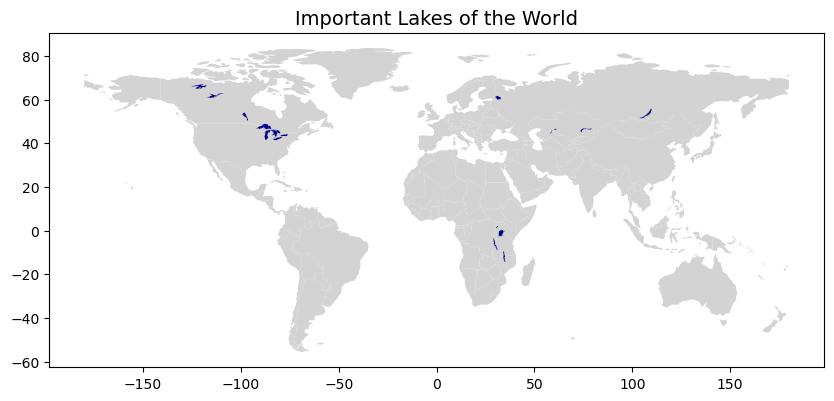

In [4]:
# Plot the lakes on GeoPandas' built-in world map:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != 'Antarctica')]  # Leave off Antarctica
ax = world.plot(color='lightgray', figsize=(10, 10))
ax.set_title("Important Lakes of the World", fontsize=14)
large_lakes.plot(ax=ax, color='darkblue');

In [5]:
origin_type = {'Lake Superior': 'glacial', 
               'Lake Michigan': 'glacial', 
               'Lake Huron': 'glacial',
               'Lake Erie': 'glacial', 
               'Lake Ontario': 'glacial', 
               'Great Bear Lake': 'glacial',
               'Great Slave Lake': 'glacial', 
               'McLeod Bay': 'glacial', 
               'Lake Winnipeg': 'glacial',
               'Lake Saint Clair': 'glacial', 
               'Lake Ladoga': 'glacial', 
               'Lake Baikal': 'rift valley', 
               'Lake Albert': 'rift valley', 
               'Lake Malawi': 'rift valley',
               'Lake Tanganyika': 'rift valley', 
               'Lake Victoria': 'rift valley', 
               'Lake Balkhash': 'tectonic depression',
               'South Aral Sea': 'tectonic depression',
               'North Aral Sea': 'tectonic depression'}

In [6]:
# Make a new GeoDataFrame with a column for the type of origin:
large_lakes_2 = large_lakes.copy()
large_lakes_2['origin type'] = large_lakes_2['name'].map(origin_type)
large_lakes_2.tail(3)

,scalerank,name,geometry,origin type
16,0,Lake Victoria,"POLYGON ((33.91355 -1.53205, 33.90472 -1.52940...",rift valley
17,0,South Aral Sea,"POLYGON ((58.31208 45.06201, 58.32684 45.07678...",tectonic depression
18,0,North Aral Sea,"POLYGON ((60.78288 46.08595, 60.75234 46.11772...",tectonic depression


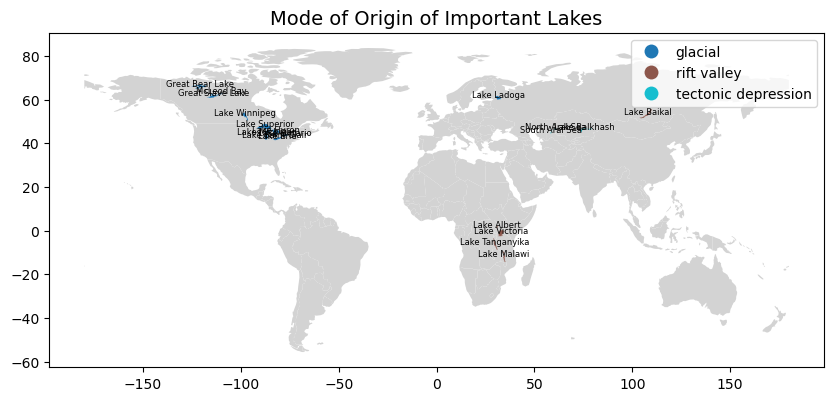

In [7]:
# Plot the largest lakes color-coded for origin type:
ax = world.plot(color='lightgray', figsize=(10, 10))
ax.set_title("Mode of Origin of Important Lakes", fontsize=14)
large_lakes_2.plot(ax=ax, 
                   column=large_lakes_2['origin type'], 
                   legend=True);

 # Add names:
large_lakes_2.apply(lambda x: ax.annotate(text=x['name'], 
                                           xy=x.geometry.centroid.coords[0], 
                                           ha='center', 
                                           fontsize=6), axis=1);